In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x=np.linspace(0,50,501)
y=np.sin(x)
df=pd.DataFrame(data=y, index=x, columns=['sine'])

In [19]:
test_percent=0.1
test_point=np.round(len(df)*test_percent)
test_index=int(len(df)-test_point)
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=6)
length=48
generator=TimeseriesGenerator(scaled_train, scaled_train,length=length, batch_size=1)
validation_generator=TimeseriesGenerator(scaled_test, scaled_test,length=length, batch_size=1)


In [22]:
model=Sequential()
model.add(LSTM(50, input_shape=(length,1)))
model.add(Dense(1)) #whic is the out put cell
model.compile(optimizer='adam', loss='mse')

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.fit(generator, epochs=80, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/80
 11/403 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.2587

C:\Users\moham\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


403/403 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0446 - val_loss: 2.1370e-04
Epoch 2/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.1754e-04 - val_loss: 3.4313e-05
Epoch 3/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.0520e-04 - val_loss: 1.0850e-05
Epoch 4/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 4.8639e-05 - val_loss: 1.9121e-04
Epoch 5/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 4.2932e-04 - val_loss: 8.8410e-07
Epoch 6/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 1.6096e-04 - val_loss: 1.7252e-05
Epoch 7/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 5.3963e-05 - val_loss: 8.3475e-05
Epoch 8/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.5725e-04 - val_loss: 6.8027e-05
Epoch 9/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 4.0357e-04 - val_loss: 3.3423e-05
Epoch 10/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 3.6066e-05 - val_loss: 3.8047e-06
Epoch 11/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 4

<AxesSubplot:>

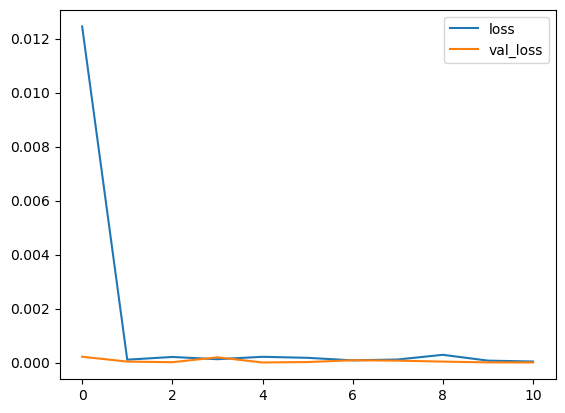

In [24]:
losses=pd.DataFrame(model.history.history)
losses.plot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

C:\Users\moham\AppData\Local\Temp\ipykernel_3396\1442708194.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_prediction


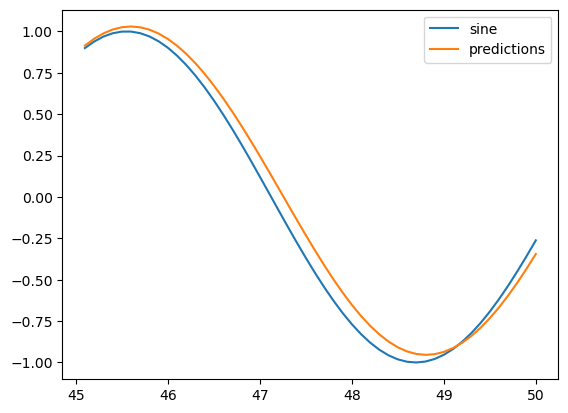

In [25]:
# Prediction
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, 1)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse scaling
true_prediction = scaler.inverse_transform(test_predictions)
test['predictions'] = true_prediction
test.plot()

plt.show()